<a href="https://colab.research.google.com/github/Kingfinalweapon/kings/blob/master/boat_merge_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
boat_time = pd.read_csv('boat_time.csv')
boat_time.head()

,rece_id,recers_id,age,branch,weight,class_another,nation_win,nation_win2,local_win,local_win2,motor_win2,boat_win2
0,202008192401,4720,26,15,44,1,3.97,15.79,3.65,13.46,31.25,41.38
1,202008192401,4947,28,13,48,1,2.74,7.41,1.75,6.25,41.67,36.54
2,202008192401,4088,40,15,47,2,4.66,30.26,4.54,25.88,32.43,29.17
3,202008192401,5069,19,14,44,2,2.76,4.29,0.00,0.00,37.84,38.46
4,202008192401,5088,20,4,47,2,1.74,2.13,1.40,0.00,56.76,42.22


In [ ]:
boat_result = pd.read_csv('boat_result.csv')
boat_result.head()

,rece_id,recers_id,determined,ex_time,ap_course,st,weather,wind_d,wind_s,wave,rank
0,202008010301,4422,2,6.80,2,0.11,0,1,6,5,0
1,202008010301,4453,2,6.74,3,0.09,0,1,6,5,0
2,202008010301,4405,2,6.80,1,0.12,0,1,6,5,0
3,202008010301,3863,2,6.75,6,0.19,0,1,6,5,1
4,202008010301,5065,2,6.72,4,0.11,0,1,6,5,1


In [ ]:
merge_data = pd.merge(boat_time,boat_result,on=['rece_id','recers_id'],how='left')
merge_data.head()

,rece_id,recers_id,age,branch,weight,class_another,nation_win,nation_win2,local_win,local_win2,...,boat_win2,determined,ex_time,ap_course,st,weather,wind_d,wind_s,wave,rank
0,202008192401,4720,26,15,44,1,3.97,15.79,3.65,13.46,...,41.38,1.0,7.02,1.0,0.13,0.0,2.0,1.0,1.0,0.0
1,202008192401,4947,28,13,48,1,2.74,7.41,1.75,6.25,...,36.54,1.0,6.98,2.0,0.15,0.0,2.0,1.0,1.0,1.0
2,202008192401,4088,40,15,47,2,4.66,30.26,4.54,25.88,...,29.17,1.0,6.96,3.0,0.18,0.0,2.0,1.0,1.0,1.0
3,202008192401,5069,19,14,44,2,2.76,4.29,0.00,0.00,...,38.46,1.0,6.95,4.0,0.14,0.0,2.0,1.0,1.0,0.0
4,202008192401,5088,20,4,47,2,1.74,2.13,1.40,0.00,...,42.22,1.0,6.97,5.0,0.15,0.0,2.0,1.0,1.0,0.0


In [ ]:
merge_data.isnull().sum()

rece_id            0
recers_id          0
age                0
branch             0
weight             0
class_another      0
nation_win         0
nation_win2        0
local_win          0
local_win2         0
motor_win2         0
boat_win2          0
determined       393
ex_time          393
ap_course        393
st               393
weather          393
wind_d           393
wind_s           393
wave             393
rank             393
dtype: int64

In [ ]:
# フライングなどの選手を削除
merge_data.dropna(subset=['st'],inplace=True)

In [ ]:
# 他漏れがないか確認
print(merge_data.shape)
print(merge_data.isnull().sum())
print(merge_data.dtypes)


(27759, 21)
rece_id          0
recers_id        0
age              0
branch           0
weight           0
class_another    0
nation_win       0
nation_win2      0
local_win        0
local_win2       0
motor_win2       0
boat_win2        0
determined       0
ex_time          0
ap_course        0
st               0
weather          0
wind_d           0
wind_s           0
wave             0
rank             0
dtype: int64
rece_id            int64
recers_id          int64
age                int64
branch             int64
weight             int64
class_another      int64
nation_win       float64
nation_win2      float64
local_win        float64
local_win2       float64
motor_win2       float64
boat_win2        float64
determined       float64
ex_time          float64
ap_course        float64
st               float64
weather          float64
wind_d           float64
wind_s           float64
wave             float64
rank             float64
dtype: object


In [ ]:
# testとtrain分ける
train = merge_data.iloc[:round((len(merge_data) * 0.7))]
test = merge_data.iloc[round((len(merge_data) * 0.7)):]
print(len(train))
print(len(test))


19431
8328


In [ ]:
# testとtrain分ける学習データはモデルの訓練に使用され、モデルがデータからパターンを学ぶためのものです。
#一方、テストデータはモデルがどれだけうまく一般化されたか、つまり未知のデータに対してどれだけ正確に予測できるかを評価するために使用されます。
def split_data(df,test_size=0.3):
  df = df.sort_values('rece_id')
  train = df.iloc[:round((len(df) * (1 - test_size)))]
  test = df.iloc[round((len(df) * (1 - test_size))):]
  return train,test
train_a,test_b = split_data(merge_data)

In [ ]:
from pandas.io.pickle import ReadPickleBuffer
X_train = train.drop(['rece_id','rank'],axis=1)
y_train = train['rank']
X_test = test.drop(['rece_id','rank'],axis=1)
y_test = test['rank']

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rf.predict_proba(X_test)[:,1]
y_pred

array([0.17, 0.67, 0.45, ..., 0.35, 0.48, 0.15])

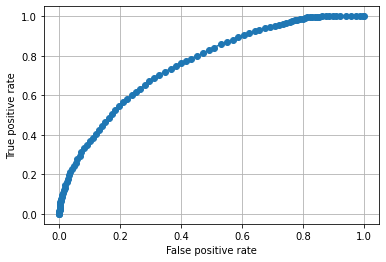

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, marker='o')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [ ]:
from lightgbm.sklearn import LGBMClassifier
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',  # default = 'gbdt'
    'num_leaves': 63,         # default = 31,
    'learning_rate': 0.01,    # default = 0.1
    'feature_fraction': 0.8,  # default = 1.0
    'bagging_freq': 1,        # default = 0
    'bagging_fraction': 0.8,  # default = 1.0
    'random_state': 0,        # default = None
}

lgb_clf = LGBMClassifier(**params)
lgb_clf.fit(X_train,y_train)
y_pred_train = lgb_clf.predict_proba(X_train)[:,1]
y_pred = lgb_clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
0.8217199385204538
0.7732679259883968


In [ ]:
# 特徴量の重要度の算出
pd.Series(lgb_clf.feature_importances_,index=X_train.columns).to_frame(name='重要度')

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

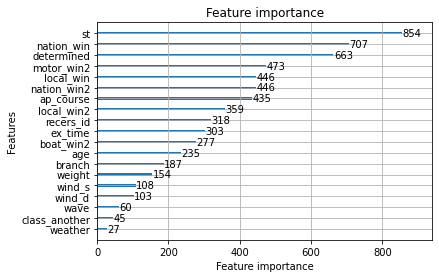

In [ ]:
lgb.plot_importance(lgb_clf)

In [ ]:
y_pred = rf.predict(X_test)
pred_df = pd.DataFrame({'preb':y_pred,'actual':y_test})
pred_df

,preb,actual
22243,0.0,0.0
22247,1.0,1.0
22104,0.0,0.0
22105,0.0,0.0
22107,1.0,1.0
...,...,...
3598,0.0,0.0
3597,1.0,0.0
3596,0.0,1.0
3595,0.0,1.0
